# Movie Recommendation Project 
## By Japjeet Singh (195812010)

## Step 0 : Import Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('darkgrid')

## Step 1 : Import The Dateset
Link to the dataset = https://grouplens.org/datasets/movielens/

Description: 
This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 2, 2019. This dataset was generated on September 2, 2019.

In [4]:
moviedb = pd.read_csv('movies_updated.csv')

In [5]:
moviedb.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
moviedb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9740 entries, 0 to 9739
Data columns (total 3 columns):
movieId    9740 non-null int64
title      9740 non-null object
genres     9740 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [7]:
moviedb.describe()

,movieId
count,9740.000000
mean,42176.673922
std,52139.269974
min,1.000000
25%,3247.750000
50%,7298.000000
75%,76173.500000
max,193609.000000


In [8]:
ratingdb = pd.read_csv("ratings_updated.csv")

In [9]:
ratingdb.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
ratingdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100834 entries, 0 to 100833
Data columns (total 4 columns):
userId       100834 non-null int64
movieId      100834 non-null int64
rating       100834 non-null float64
timestamp    100834 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
ratingdb.describe()

,userId,movieId,rating,timestamp
count,100834.000000,100834.000000,100834.000000,1.008340e+05
mean,326.128488,19432.556856,3.501597,1.205940e+09
std,182.618643,35525.961422,1.042499,2.162593e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8120.500000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Step 1.1 : Removing the Unnecessary Attributes

In [12]:
ratingdb.drop("timestamp",axis=1,inplace=True)

In [13]:
ratingdb.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


## Step 2 : Merging Movie dataset and Rating dataset on the movieId attribute

In [14]:
movie_rating_db = pd.merge(moviedb,ratingdb,on='movieId')
movie_rating_db.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [15]:
movie_rating_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100834 entries, 0 to 100833
Data columns (total 5 columns):
movieId    100834 non-null int64
title      100834 non-null object
genres     100834 non-null object
userId     100834 non-null int64
rating     100834 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [16]:
movie_rating_db.describe()

,movieId,userId,rating
count,100834.000000,100834.000000,100834.000000
mean,19432.556856,326.128488,3.501597
std,35525.961422,182.618643,1.042499
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8120.500000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


### Now let's take a quick look at the number of unique users and movies.

In [62]:
n_users = movie_rating_db["userId"].nunique()
n_movies = movie_rating_db["movieId"].nunique()

print('Num of Users: ',n_users)
print('Num of Movies: ',n_movies)

Num of Users:  610
Num of Movies:  9722


### Extracting Year from the titles

In [19]:
movie_rating_db['title'].count()

100834

In [20]:
int(movie_rating_db['title'][27222][-5:-1])

1973

In [18]:
list = []

In [21]:
for i in range(movie_rating_db['title'].count()):
    list.append(int(movie_rating_db['title'][i][-5:-1]))

In [22]:
movie_rating_db['Year'] = list

In [23]:
movie_rating_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100834 entries, 0 to 100833
Data columns (total 6 columns):
movieId    100834 non-null int64
title      100834 non-null object
genres     100834 non-null object
userId     100834 non-null int64
rating     100834 non-null float64
Year       100834 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.9+ MB


In [24]:
movie_rating_db.describe()

,movieId,userId,rating,Year
count,100834.000000,100834.000000,100834.000000,100834.000000
mean,19432.556856,326.128488,3.501597,1994.447627
std,35525.961422,182.618643,1.042499,14.362505
min,1.000000,1.000000,0.500000,1902.000000
25%,1199.000000,177.000000,3.000000,1990.000000
50%,2991.000000,325.000000,3.500000,1997.000000
75%,8120.500000,477.000000,4.000000,2003.000000
max,193609.000000,610.000000,5.000000,2019.000000


### Group by Rating to calculate the count and the mean rating given to the movie

In [25]:
movie_count_mean = movie_rating_db.groupby('title')['rating'].describe()

In [26]:
movie_count_mean.drop(movie_count_mean.columns[2:],axis=1,inplace=True)

In [27]:
movie_count_mean.head()

,count,mean
title,,
'71 (2014),1.0,4.0
'Hellboy': The Seeds of Creation (2004),1.0,4.0
'Round Midnight (1986),2.0,3.5
'Salem's Lot (2004),1.0,5.0
'Til There Was You (1997),2.0,4.0


In [32]:
movie_count_mean.describe()

,count,mean
count,9717.000000,9717.000000
mean,10.377071,3.262751
std,22.408123,0.869696
min,1.000000,0.500000
25%,1.000000,2.800000
50%,3.000000,3.416667
75%,9.000000,3.910714
max,329.000000,5.000000


In [33]:
movie_count_mean.sort_values(by='count',ascending=False)

,count,mean
title,,
Forrest Gump (1994),329.0,4.164134
"Shawshank Redemption, The (1994)",317.0,4.429022
Pulp Fiction (1994),307.0,4.197068
"Silence of the Lambs, The (1991)",279.0,4.161290
"Matrix, The (1999)",278.0,4.192446
...,...,...
King Solomon's Mines (1950),1.0,3.000000
King Solomon's Mines (1937),1.0,2.500000
King Ralph (1991),1.0,1.500000


### Displaying the Mean and Count distribution

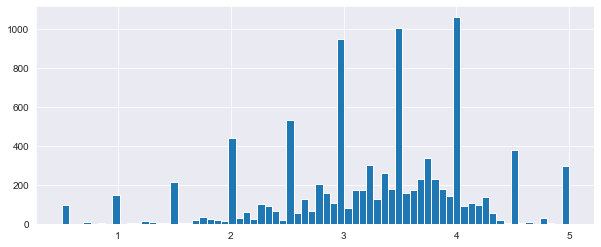

In [28]:
plt.figure(figsize=(10,4))
movie_count_mean['mean'].hist(bins=70)

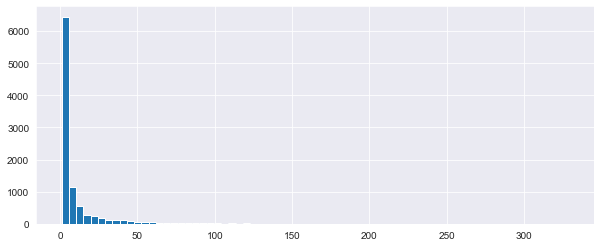

In [29]:
plt.figure(figsize=(10,4))
movie_count_mean['count'].hist(bins=70)

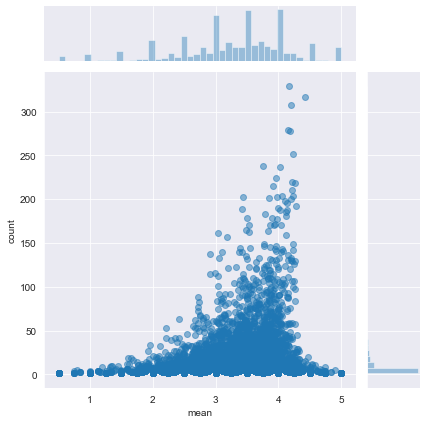

In [30]:
sns.jointplot(x='mean',y='count',data=movie_count_mean,alpha=0.5)

## Step 3 : Creating a pivot table with: 
- Coloumn names as titles of the movie
- Row index as the user Id
- Values as the Ratings user gave to the movies

In [31]:
moviemat = movie_rating_db.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4 : Let us take 2 movies that we will try to find recomendations for
- Pulp Fiction
- The Dictator

In [143]:
pulpfiction = moviemat['Pulp Fiction (1994)']

In [144]:
pulpfiction.head()

userId
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

### Lets calculate the correlations

In [146]:
pulpfiction_cor = pd.DataFrame(moviemat.corrwith(pulpfiction),columns=['Correlation'])
pulpfiction_cor = pulpfiction_cor.join(movie_count_mean['count'])

In [147]:
pulpfiction_cor.head(10)

,Correlation,count
title,,
'71 (2014),NaN,1.0
'Hellboy': The Seeds of Creation (2004),NaN,1.0
'Round Midnight (1986),NaN,2.0
'Salem's Lot (2004),NaN,1.0
'Til There Was You (1997),NaN,2.0
'Tis the Season for Love (2015),NaN,1.0
"'burbs, The (1989)",-0.187323,17.0
'night Mother (1986),NaN,1.0
(500) Days of Summer (2009),-0.044034,42.0


In [148]:
pulpfiction_cor.dropna(inplace=True)
pulpfiction_cor.head(10)

,Correlation,count
title,,
"'burbs, The (1989)",-0.187323,17.0
(500) Days of Summer (2009),-0.044034,42.0
*batteries not included (1987),-0.738549,7.0
...And Justice for All (1979),-0.188982,3.0
10 Cent Pistol (2015),1.000000,2.0
10 Cloverfield Lane (2016),-0.201347,14.0
10 Things I Hate About You (1999),-0.126206,54.0
"10,000 BC (2008)",-0.409514,17.0
101 Dalmatians (1996),0.289800,47.0


In [149]:
pulpfiction_cor.sort_values('Correlation',ascending=False)

,Correlation,count
title,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2.0
Azumi (2003),1.0,2.0
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2.0
"War Zone, The (1999)",1.0,2.0
"Wolfman, The (2010)",1.0,2.0
Outlander (2008),1.0,3.0
Luxo Jr. (1986),1.0,2.0
"Claymation Christmas Celebration, A (1987)",1.0,2.0
"Return, The (Vozvrashcheniye) (2003)",1.0,3.0


### Limiting the count till 5

In [175]:
pulpfiction_cormax = pulpfiction_cor[pulpfiction_cor['count']>5].sort_values('Correlation',ascending=False)

In [176]:
pulpfiction_cormax= pulpfiction_cormax.reset_index()

In [191]:
pulpfiction_cormax.head(10)

,title,Correlation,count
0,"Wings of the Dove, The (1997)",1.000000,6.0
1,"Misérables, Les (2012)",1.000000,7.0
2,Center Stage (2000),1.000000,6.0
3,Holiday Inn (1942),1.000000,8.0
4,Inherit the Wind (1960),1.000000,6.0
5,Pulp Fiction (1994),1.000000,307.0
6,Klute (1971),1.000000,6.0
7,The Accountant (2016),1.000000,6.0
8,"Brave Little Toaster, The (1987)",1.000000,8.0
9,Just Friends (2005),0.981981,6.0


### Now finding for The Dictator

In [35]:
dictator = moviemat['Dictator, The (2012)']

In [36]:
dictator.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Dictator, The (2012), dtype: float64

### Lets calculate the correlations

In [39]:
dictator_cor = pd.DataFrame(moviemat.corrwith(dictator),columns=['Correlation'])
dictator_cor = dictator_cor.join(movie_count_mean['count'])

In [40]:
dictator_cor.head(10)

,Correlation,count
title,,
'71 (2014),NaN,1.0
'Hellboy': The Seeds of Creation (2004),NaN,1.0
'Round Midnight (1986),NaN,2.0
'Salem's Lot (2004),NaN,1.0
'Til There Was You (1997),NaN,2.0
'Tis the Season for Love (2015),NaN,1.0
"'burbs, The (1989)",NaN,17.0
'night Mother (1986),NaN,1.0
(500) Days of Summer (2009),0.155075,42.0


In [41]:
dictator_cor.dropna(inplace=True)
dictator_cor.head(10)

,Correlation,count
title,,
(500) Days of Summer (2009),0.155075,42.0
10 Cent Pistol (2015),-1.000000,2.0
10 Cloverfield Lane (2016),0.870388,14.0
10 Things I Hate About You (1999),-0.187485,54.0
101 Dalmatians (1996),0.944911,47.0
12 Angry Men (1957),0.522233,57.0
12 Years a Slave (2013),0.329785,16.0
127 Hours (2010),0.932203,18.0
13 Hours (2016),0.576557,5.0


In [42]:
dictator_cor.sort_values('Correlation',ascending=False)

,Correlation,count
title,,
"Ladykillers, The (2004)",1.0,14.0
Hot Rod (2007),1.0,7.0
"Island, The (2005)",1.0,31.0
"Iron Giant, The (1999)",1.0,39.0
Inglorious Bastards (Quel maledetto treno blindato) (1978),1.0,7.0
...,...,...
"Fantastic Fear of Everything, A (2012)",-1.0,2.0
Airheads (1994),-1.0,26.0
Beerfest (2006),-1.0,6.0


In [43]:
dictator_cormax = dictator_cor[dictator_cor['count']>5].sort_values('Correlation',ascending=False)

In [44]:
dictator_cormax= dictator_cormax.reset_index()

In [45]:
dictator_cormax.head(10)

,title,Correlation,count
0,xXx (2002),1.0,24.0
1,Band of Brothers (2001),1.0,7.0
2,"Net, The (1995)",1.0,112.0
3,Hot Rod (2007),1.0,7.0
4,Duck Soup (1933),1.0,23.0
5,National Lampoon's Vacation (1983),1.0,26.0
6,Justice League (2017),1.0,6.0
7,House of Flying Daggers (Shi mian mai fu) (2004),1.0,25.0
8,Coraline (2009),1.0,35.0
9,Mystery Men (1999),1.0,39.0


In [46]:
try3 = pd.merge(moviedb,dictator_cormax,on='title')

In [49]:
try3 = try3.sort_values('Correlation',ascending=False)

In [56]:
try3[['title','genres']][try3['Correlation'] == 1]

,title,genres
860,AVPR: Aliens vs. Predator - Requiem (2007),Action|Horror|Sci-Fi
230,Mercury Rising (1998),Action|Drama|Thriller
241,Halloween (1978),Horror
692,"Animatrix, The (2003)",Action|Animation|Drama|Sci-Fi
255,BASEketball (1998),Comedy
...,...,...
861,P.S. I Love You (2007),Comedy|Drama|Romance
50,Beverly Hills Cop III (1994),Action|Comedy|Crime|Thriller
853,Hitman (2007),Action|Crime|Thriller
832,Hot Rod (2007),Comedy


--------------------

In [103]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(movie_rating_dbtry, test_size=0.25)

## Memory-Based Collaborative Filtering

Memory-Based Collaborative Filtering approaches can be divided into two main sections: **user-item filtering** and **item-item filtering**. 

A *user-item filtering* will take a particular user, find users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked. 

In contrast, *item-item filtering* will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and outputs other items as recommendations. 

* *Item-Item Collaborative Filtering*: “Users who liked this item also liked …”
* *User-Item Collaborative Filtering*: “Users who are similar to you also liked …”

In [79]:
movie_rating_dbtry = movie_rating_db

In [118]:
anewmoviedb = pd.DataFrame(movie_rating_dbtry['title'].unique(),columns=['title'])
anewmoviedb.head()

,title
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Waiting to Exhale (1995)
4,Father of the Bride Part II (1995)


In [119]:
anewmoviedb.reset_index(inplace=True)

In [120]:
anewmoviedb.head()

,index,title
0,0,Toy Story (1995)
1,1,Jumanji (1995)
2,2,Grumpier Old Men (1995)
3,3,Waiting to Exhale (1995)
4,4,Father of the Bride Part II (1995)


In [121]:
anewmoviedb.rename({'index': 'anewmovieid'}, axis=1,inplace=True)

In [122]:
movie_rating_dbtry = pd.merge(movie_rating_dbtry,anewmoviedb,on='title')

In [104]:
movie_rating_dbtry.head()

,movieId,title,genres,userId,rating,Year,anewmovieid
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1995,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1995,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1995,0


-------------------

In [105]:
train_data_matrix = np.zeros((n_users, n_movies))
for line in train_data.itertuples():
    train_data_matrix[line[4]-1, line[7]-1] = line[5]  

In [106]:
test_data_matrix = np.zeros((n_users, n_movies))
for line in test_data.itertuples():
    test_data_matrix[line[4]-1, line[7]-1] = line[5]

In [107]:
train_data_matrix.shape

(610, 9722)

In [108]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [110]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #Using np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [111]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [113]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.304871818583842
Item-based CF RMSE: 3.523308215000213
